In [1]:
# set the working directory to be the root of the package
# so that the imports work below
import sys
sys.path.append("..")

In [2]:
import numpy as np
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
import models.xgb as xgb
import models.data_util

In [3]:
data_file = "../data/clean.pkl"  # set this accordingly
model_file = "../data/xgb_model.bin"

In [4]:
# Use helper function to convert everything to numpy etc:
x, y_true = models.data_util.load_raw_data(data_file, cols=[
    'Field*',
    'Mortgages*',
    'pos1', 'pos2',
    'dAccountsLastMadeUpDate',
    'dAccountsNextDueDate',
    'dConfStmtLastMadeUpDate',
    'dConfStmtNextDueDate',
    'dContextInstant',
    'dIncorporationDate',
    'dPreviousName_1CONDATE',
    'dPreviousName_2CONDATE',
    'dReturnsLastMadeUpDate',
    'dReturnsNextDueDate',
    'eAccountsCategory',
    'eCompanyCategory',
    'SIC*', 'nSIC*',
    'AccountsAccountCategory*',
    'CompanyCategory*'
])

In [5]:
# load model
model = xgb.from_file(model_file)

In [6]:
# predict probabilities of positive class:
y_pred = model.predict_proba(x).T[1].T
print(y_pred)

[0.49999523 0.49999523 0.49999523 ... 0.50000316 0.50000316 0.5000009 ]


In [7]:
# get ROC graph
fpr, tpr, thresholds = skl.metrics.roc_curve(y_true, y_pred)

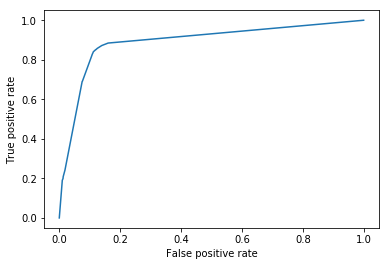

In [8]:
plt.plot(fpr, tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [9]:
print("Area =", skl.metrics.auc(fpr, tpr))

Area = 0.8904642558528428
